<a href="https://colab.research.google.com/github/gagan3754/Bank/blob/main/Losing_bank_customers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Losing bank customers
• Every bank wants to hold their customers for sustaining their business and thus this Anonymous Multinational bank. You have customer data of account holders at Anonymous Multinational Bank with the aim of understanding • exploring the correlation between variables such as credit score, age, tenure, balance, and geography with customer churn. Assess the impact of demographic factors like gender and the presence of credit cards on churn rates. • Additionally, analyze customer satisfaction scores and complaint resolutions to identify areas for service improvement. Utilize your analytics skills to find factors contributing to potential churn based. This project provides an opportunity to enhance customer retention strategies by uncovering patterns and insights within the dataset.

Losing bank customers

Data description

RowNumber—corresponds to the record (row) number and has no effect on the output.

CustomerId—contains random values and has no effect on customer leaving the bank.

Surname—the surname of a customer has no impact on their decision to leave the bank.

CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography—a customer’s location can affect their decision to leave the bank.

Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts—refers to the number of products that a customer has purchased through the bank.

HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

IsActiveMember—active customers are less likely to leave the bank.

EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited—whether or not the customer left the bank.

Complain—customer has complaint or not.

Satisfaction Score—Score provided by the customer for their complaint resolution.

Card Type—type of card hold by the customer.

Points Earned—the points earned by the customer for using credit card.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown 1q1Mh3Mm4kv1LitxWcdY6--gNHVmuAfPP


Downloading...
From: https://drive.google.com/uc?id=1q1Mh3Mm4kv1LitxWcdY6--gNHVmuAfPP
To: /content/Bank-Records.csv
100% 837k/837k [00:00<00:00, 47.4MB/s]


In [3]:
data = pd.read_csv('Bank-Records.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
data.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [6]:
data.shape

(10000, 18)

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [8]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [9]:
data.duplicated().sum()

0

In [10]:
data['CustomerId'].nunique()

10000

#Performing Basic Exploring data analysis

In [11]:
data.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350


In [12]:
data[['CustomerId','Exited']]

,CustomerId,Exited
0,15634602,1
1,15647311,0
2,15619304,1
3,15701354,0
4,15737888,0
...,...,...
9995,15606229,0
9996,15569892,0
9997,15584532,1
9998,15682355,1


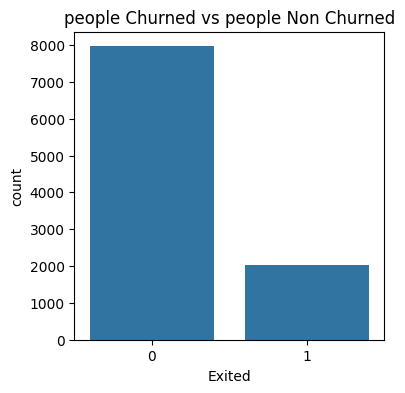

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(x=data['Exited'])
plt.title('people Churned vs people Non Churned')
plt.show()

In [14]:
data['Exited'].value_counts()

,count
Exited,
0,7962
1,2038


In [15]:
pd.crosstab(data['Complain'],data['Exited'],margins=True)

Exited,0,1,All
Complain,,,
0,7952,4,7956
1,10,2034,2044
All,7962,2038,10000


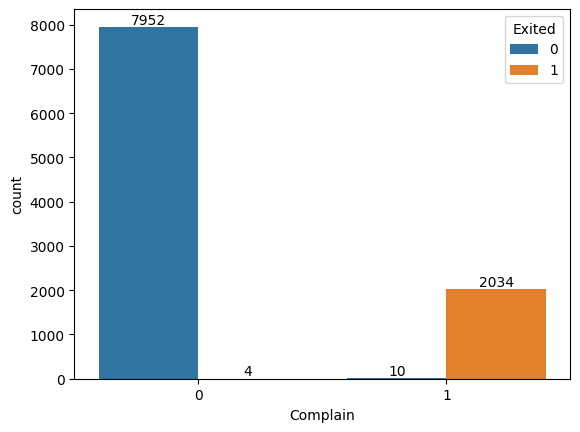

In [16]:
ax1=sns.countplot(x=data['Complain'],hue=data['Exited'])
for container in ax1.containers:
  ax1.bar_label(container)

out of 2038 customer churned there were 2034 customer who complained

In [17]:
pd.crosstab(columns=data['Satisfaction Score'],index=data['Exited'])

Satisfaction Score,1,2,3,4,5
Exited,,,,,
0,1545,1575,1641,1594,1607
1,387,439,401,414,397


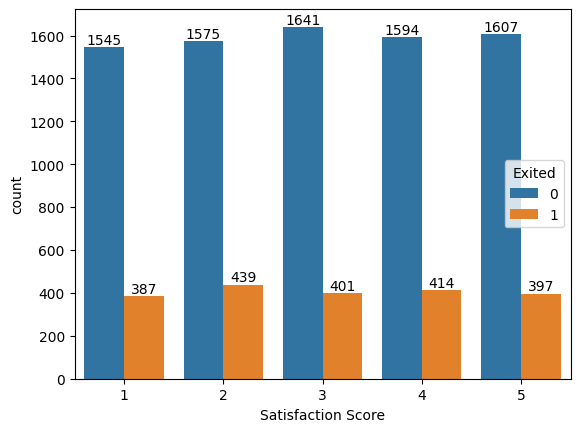

In [18]:
ax1=sns.countplot(x=data['Satisfaction Score'],hue=data['Exited'])
for container in ax1.containers:
  ax1.bar_label(container)
plt.show()

In [19]:
pd.crosstab(data['HasCrCard'],data['Exited'])

Exited,0,1
HasCrCard,,
0,2332,613
1,5630,1425


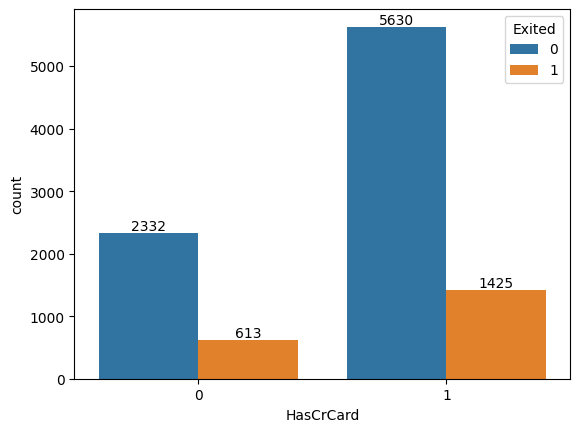

In [20]:
ax1=sns.countplot(x=data['HasCrCard'],hue=data['Exited'])
for container in ax1.containers:
  ax1.bar_label(container)
plt.show()

In [21]:
pd.crosstab(columns=data['Card Type'],index=data['Exited'])

Card Type,DIAMOND,GOLD,PLATINUM,SILVER
Exited,,,,
0,1961,2020,1987,1994
1,546,482,508,502


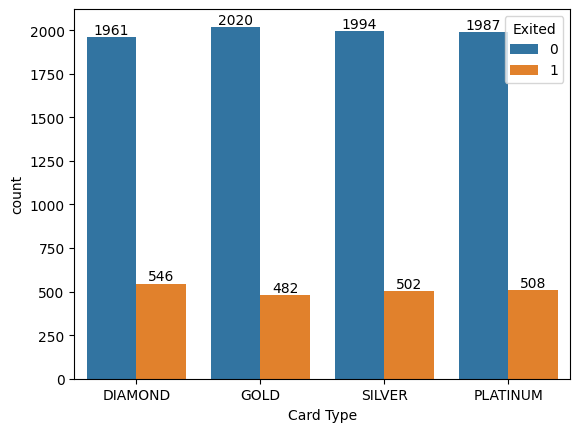

In [22]:
ax1=sns.countplot(x=data['Card Type'],hue=data['Exited'])
for container in ax1.containers:
  ax1.bar_label(container)

In [23]:
data[data['Exited']==1]['CreditScore'].max()

850

In [24]:
bins=[300,400,500,600,700,800,900]

In [25]:
credit_bin=pd.cut(data[data['Exited']==1]['CreditScore'],bins)

In [26]:
pd.crosstab(columns=credit_bin,index=data['Exited'])

CreditScore,"(300, 400]","(400, 500]","(500, 600]","(600, 700]","(700, 800]","(800, 900]"
Exited,,,,,,
1,19,133,513,753,493,127


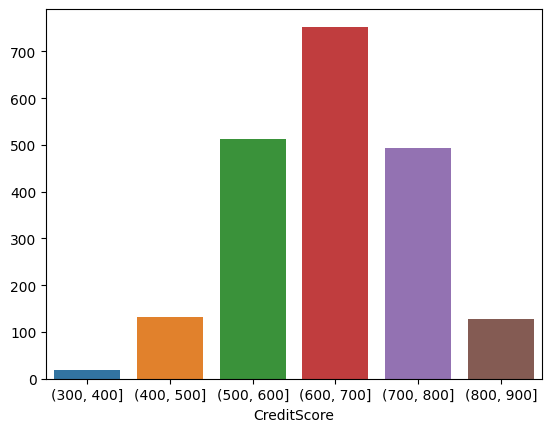

In [27]:
sns.barplot(pd.crosstab(columns=credit_bin,index=data['Exited']))
plt.show()

In [28]:
pd.crosstab(columns=data['Gender'],index=data['Exited'])

Gender,Female,Male
Exited,,
0,3404,4558
1,1139,899


In [29]:
pd.crosstab(columns=data['Geography'],index=data['Exited'])

Geography,France,Germany,Spain
Exited,,,
0,4203,1695,2064
1,811,814,413


In [30]:
pd.crosstab(columns=data['Geography'],index=data['Gender'])

Geography,France,Germany,Spain
Gender,,,
Female,2261,1193,1089
Male,2753,1316,1388


In [31]:
pd.crosstab(columns=[data['Geography'],data['Gender']],index=data['Exited'])

Geography France       Germany       Spain      
Gender    Female  Male  Female Male Female  Male
Exited                                          
0           1801  2402     745  950    858  1206
1            460   351     448  366    231   182

Text(0.5, 1.0, 'Gender churned vs Geography')

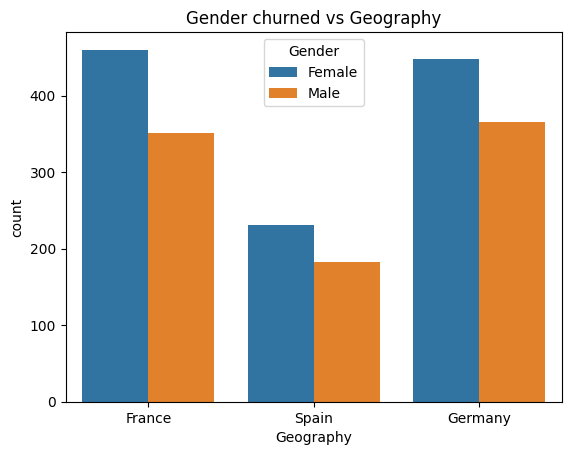

In [32]:
sns.countplot(x=data[data['Exited']==1]['Geography'],hue=data[data['Exited']==1]['Gender'])
plt.title('Gender churned vs Geography')

In [33]:
pd.crosstab(columns=[data['HasCrCard'],data['Gender']],index=data['Exited'])

HasCrCard      0            1      
Gender    Female  Male Female  Male
Exited                             
0           1007  1325   2397  3233
1            344   269    795   630

Text(0.5, 1.0, 'churned credit card vs Gender')

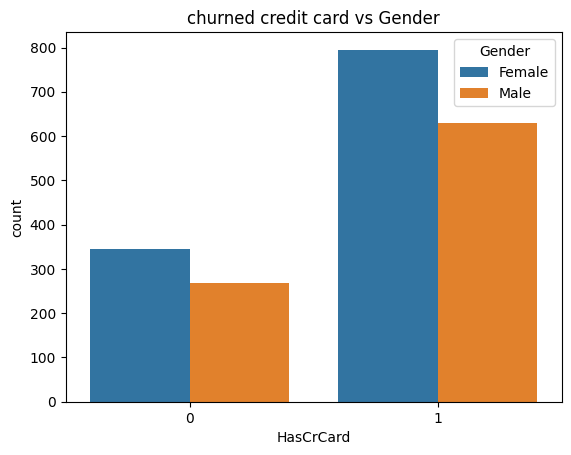

In [34]:
sns.countplot(x=data[data['Exited']==1]['HasCrCard'],hue=data[data['Exited']==1]['Gender'])
plt.title('churned credit card vs Gender')

Text(0.5, 1.0, 'Customer Churned vs balance')

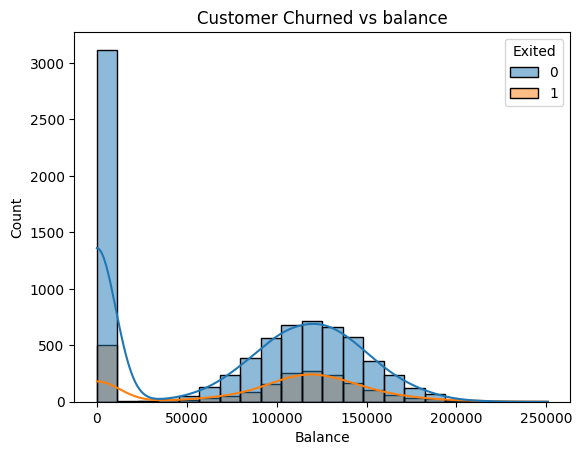

In [35]:
sns.histplot(data=data,x=data['Balance'],hue=data['Exited'],kde=True)
plt.title('Customer Churned vs balance')

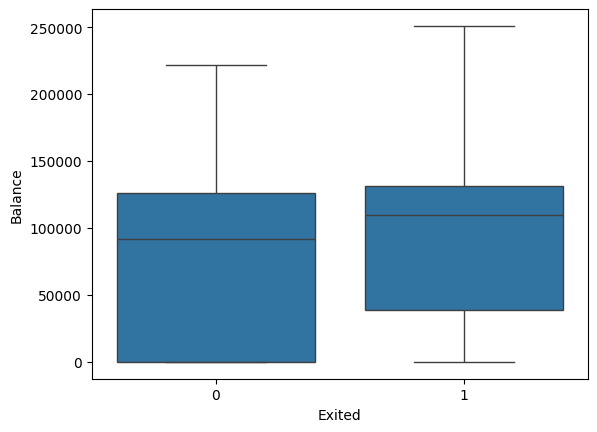

In [36]:
sns.boxplot(data=data,x='Exited',y='Balance')
plt.show('Exited vs Balance')

In [37]:
pd.crosstab(columns=data['Tenure'],index=data['Exited'])

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,318,803,847,796,786,803,771,851,828,770,389
1,95,232,201,213,203,209,196,177,197,214,101


Text(0.5, 1.0, 'Tenure V/s Exited')

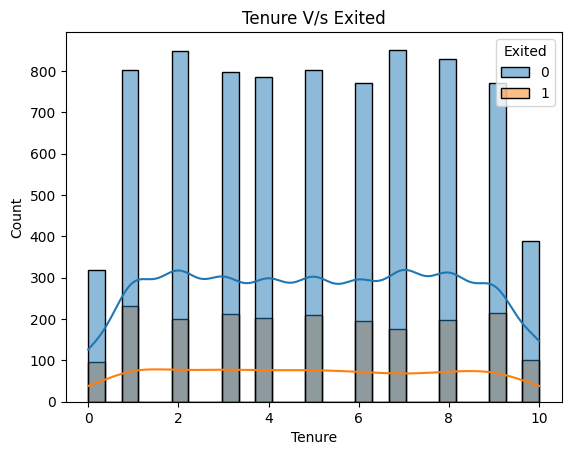

In [38]:
sns.histplot(x = data['Tenure'],hue = data['Exited'],kde =True)
plt.title('Tenure V/s Exited')

<Axes: xlabel='Tenure', ylabel='count'>

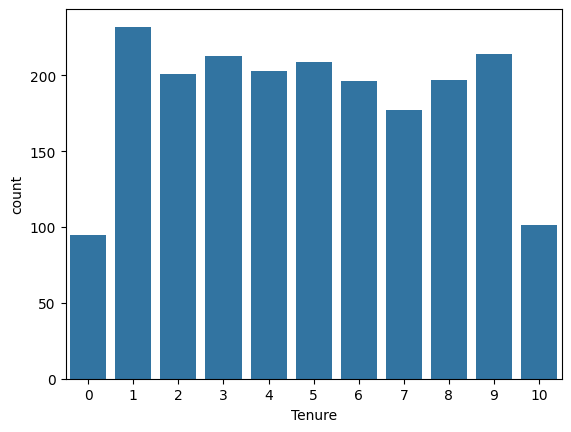

In [39]:
sns.countplot(x=data[data['Exited']==1]['Tenure'])

Lets check Estimated salary v/s balance of people w.r.t to Geography for different genders who left the bank

In [40]:
#Male

In [41]:
data.sample(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
1532,1533,15589660,Lamble,661,Germany,Female,32,1,145980.23,1,0,1,56636.28,0,0,3,DIAMOND,883
2798,2799,15576044,Macdonald,579,Germany,Male,28,6,150329.15,1,1,0,145558.42,0,0,2,PLATINUM,588
1850,1851,15587581,Russo,785,Germany,Female,33,5,136624.60,2,1,1,169117.74,0,0,3,PLATINUM,368
1684,1685,15572093,Han,613,France,Female,24,7,140453.91,1,1,0,129001.30,0,0,2,DIAMOND,245


Text(0.5, 1.0, 'salary vs balance for male')

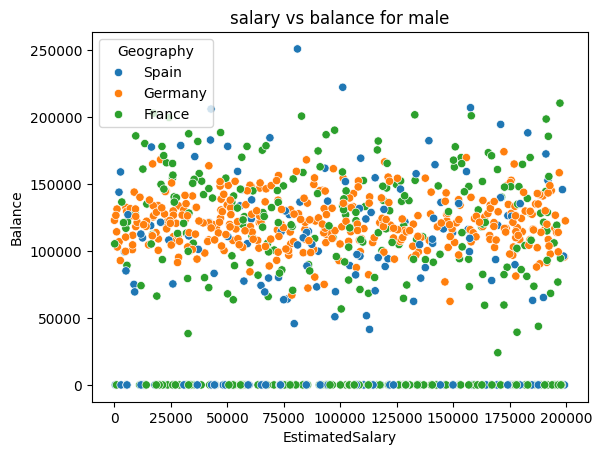

In [42]:
sns.scatterplot(data=data[(data['Exited']==1)&(data['Gender']=='Male')],x='EstimatedSalary',y='Balance',hue='Geography')
plt.title('salary vs balance for male')

In [43]:
#Female

Text(0.5, 1.0, 'salary vs balance for Female')

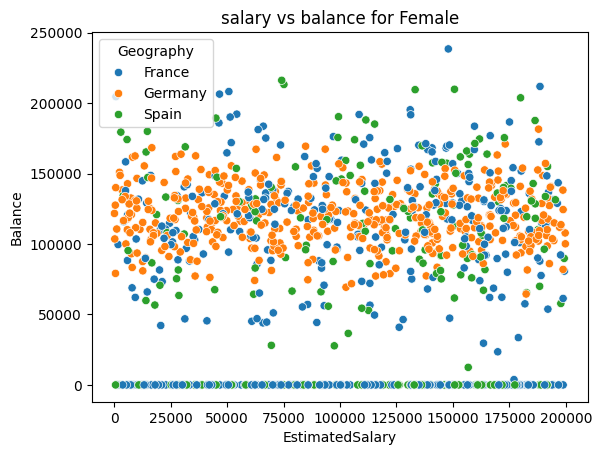

In [44]:
sns.scatterplot(data=data[(data['Exited']==1)&(data['Gender']=='Female')],x='EstimatedSalary',y='Balance',hue='Geography')
plt.title('salary vs balance for Female')

#lets create functions for our Hypothesis test inorder to check correlations

In [45]:
d1 = data [['CreditScore','Exited']]
d1

,CreditScore,Exited
0,619,1
1,608,0
2,502,1
3,699,0
4,850,0
...,...,...
9995,771,0
9996,516,0
9997,709,1
9998,772,1


Credit score vs Customer churn

In [47]:
from scipy.stats import ttest_ind,f_oneway,chi2_contingency

Ho: Customer churn is independent of Credit score

Ha: customer churn is dependent on Credit score

In [60]:
t_stats,p_value=ttest_ind(data[data['Exited']==0]['CreditScore'],data[data['Exited']==1]['CreditScore'])

In [61]:
print("t_stats :",t_stats)
print("p_value",p_value)
if p_value<0.05:
  print('Reject Null Hypothesis')
  print('Customer churn is dependent of credit Score')
else:
  print("Fail to Reject Null Hypothesis")
  print("Customer chrun is independent of Credit Score")

t_stats : 2.6778368664704235
p_value 0.0074220372427342435
Reject Null Hypothesis
Customer churn is dependent of credit Score


Age vs Customer churn

In [62]:
data[['Age','Exited']]

,Age,Exited
0,42,1
1,41,0
2,42,1
3,39,0
4,43,0
...,...,...
9995,39,0
9996,35,0
9997,36,1
9998,42,1


Ho : customer churn is independent on  Age

Ha : customer churn is dependent on Age

In [73]:
t_stats,p_value=ttest_ind(data[data['Exited']==0]['Age'],data[data['Exited']==1]['Age'])

In [74]:
print("t_stats :",t_stats)
print("p_value",p_value)
if p_value<0.05:
  print('Reject Null Hypothesis')
  print("customer churn is dependent on Age")
else:
  print('Fail to Reject Null Hypothesis')
  print('churn is independent on  Age ')

t_stats : -29.76379695489027
p_value 1.3467162476197306e-186
Reject Null Hypothesis
customer churn is dependent on Age


<Figure size 500x500 with 0 Axes>

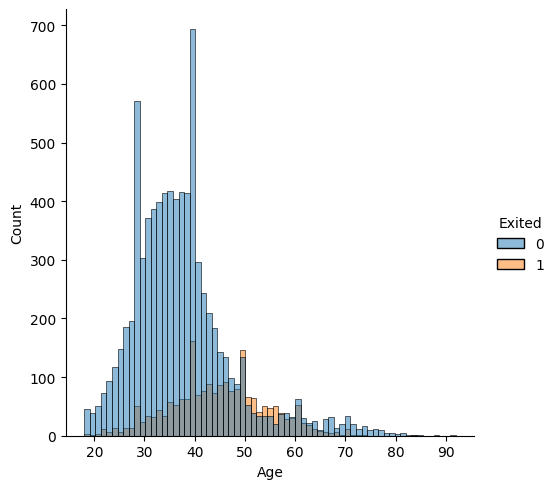

In [65]:
plt.figure(figsize=(5, 5))
sns.displot(data=data, x="Age", hue="Exited")

Tenure V/s Customer churn

In [66]:
data[['Tenure','Exited']]

,Tenure,Exited
0,2,1
1,1,0
2,8,1
3,1,0
4,2,0
...,...,...
9995,5,0
9996,10,0
9997,7,1
9998,3,1


Ho : customer churn is independent of Tenture

Ha : Customer Churn is dependent of Tenture

In [75]:
t_stats,p_value=ttest_ind(data[data['Exited']==0]['Tenure'],data[data['Exited']==1]['Tenure'])

In [76]:
print("t_stats :",t_stats)
print("p_value",p_value)
if p_value<0.05:
  print('Reject Null Hypothesis')
  print('Customer Churn is dependent of Tenture')
else:
  print('Fail to Reject Null Hypothesis')
  print('customer churn is independent of Tenture ')

t_stats : 1.365570678788837
p_value 0.1721044754880606
Fail to Reject Null Hypothesis
customer churn is independent of Tenture 


Balance vs Customer Churn

In [77]:
print(" max Balance of person who churned ", data[data['Exited'] == 1]['Balance'].max())
print(" min Balance of person who churned ",data[data['Exited'] == 1]['Balance'].min())
print(" max Balance of person who didn't churned ", data[data['Exited'] == 0]['Balance'].max())
print(" min Balance of person who  didn't churned ",data[data['Exited'] == 0]['Balance'].min())

 max Balance of person who churned  250898.09
 min Balance of person who churned  0.0
 max Balance of person who didn't churned  221532.8
 min Balance of person who  didn't churned  0.0


<Axes: xlabel='Exited', ylabel='Balance'>

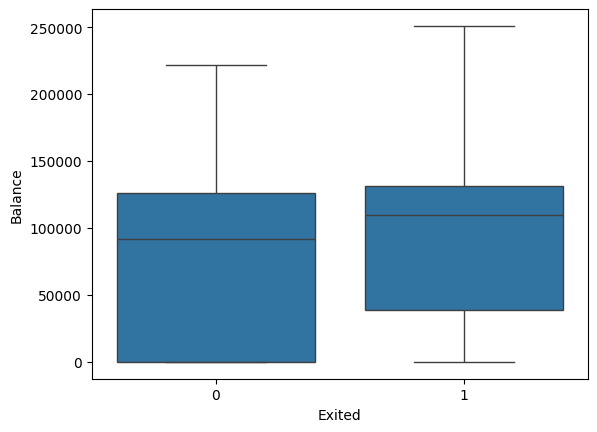

In [78]:
sns.boxplot(y = data['Balance'], x= data['Exited'])

Ho: Customer Churn is independent of Balance

Ha: Customer Churn is dependent of Balance

In [79]:
t_stats,p_value=ttest_ind(data[data['Exited']==0]['Balance'],data[data['Exited']==1]['Balance'])

In [80]:
print("t_stats :",t_stats)
print("p_value",p_value)
if p_value<0.05:
  print('Reject Null Hypothesis')
  print('customer churn is dependent on balance')
else:
  print('Fail to reject Null Hypothesis')
  print('Customer churn is independent on balance')

t_stats : -11.940747722508185
p_value 1.2092076077156017e-32
Reject Null Hypothesis
customer churn is dependent on balance


Geogrpahy v/s customer churn

In [81]:
data[['Geography','Exited']]

,Geography,Exited
0,France,1
1,Spain,0
2,France,1
3,France,0
4,Spain,0
...,...,...
9995,France,0
9996,France,0
9997,France,1
9998,Germany,1


In [83]:
pd.crosstab(columns=data['Geography'],index=data['Exited'])

Geography,France,Germany,Spain
Exited,,,
0,4203,1695,2064
1,811,814,413


Ho : Customer chrun is independent of Geography

Ha : Customer chrun is dependent on Geography

In [84]:
t_stats,p_value,df,expected_freq=chi2_contingency(pd.crosstab(columns=data['Geography'],index=data['Exited']))

In [86]:
print("t_stats :",t_stats)
print("p_value",p_value)
if p_value<0.05:
  print("Reject Null Hypothesis")
  print('Customer churn is dependent of Geography')
else:
  print("Fail to Reject Null Hypothesis")
  print("Customer churn is independent of Geography")

t_stats : 300.6264011211942
p_value 5.245736109572763e-66
Reject Null Hypothesis
Customer churn is dependent of Geography


Impact assessement of different features on Customer churn

Gender and Customer Churn

In [93]:
pd.crosstab(columns=data['Gender'],index=data['Exited'])


Gender,Female,Male
Exited,,
0,3404,4558
1,1139,899


Ho : Customer Churn is independent of Gender

Ha :Customer Churn is dependent on Gender

In [94]:
t_stats,p_value,df,expected_freq=chi2_contingency(pd.crosstab(columns=data['Gender'],index=data['Exited']))

In [96]:
print("t_stats :",t_stats)
print("p_value",p_value)
if p_value<0.05:
  print('Reject Nul Hypothesis')
  print("Customer churn is dependent on Gender")
else:
  print("Fail to Reject Null Hypotesis")
  print("Customer churn is independent of Gender")

t_stats : 112.39655374778587
p_value 2.9253677618642e-26
Reject Nul Hypothesis
Customer churn is dependent on Gender


<Axes: xlabel='Gender', ylabel='count'>

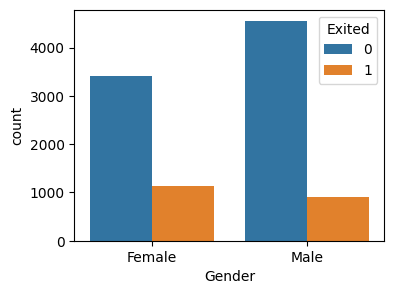

In [97]:
plt.figure(figsize=(4,3))
sns.countplot(x=data['Gender'],hue=data['Exited'])


Impact of Credit Card on Churn rate

In [98]:
pd.crosstab(columns=data['Card Type'],index=data['Exited'])

Card Type,DIAMOND,GOLD,PLATINUM,SILVER
Exited,,,,
0,1961,2020,1987,1994
1,546,482,508,502


Ho : Customer churn and Credit Card are independent

Ha : Customer churn and Credirt Card are dependent

In [100]:
t_stats,p_value,df,expected_freq=chi2_contingency(pd.crosstab(columns=data['Card Type'],index=data['Exited']))

In [101]:
print("t_stats :",t_stats)
print("p_value",p_value)
if p_value<0.05:
  print("Reject Null Hypothesis")
  print("Customer churn and Credit Card are dependent")
else:
  print("Fail to Reject Null Hypothesis")
  print("Customer churn and Credirt Card are dependent")

t_stats : 5.053223027060927
p_value 0.16794112067810177
Fail to Reject Null Hypothesis
Customer churn and Credirt Card are dependent


#Strategies for customer retenion strategies

In [102]:
data_banking_behaviour = data.loc[data['Exited'] ==1,['CustomerId','Tenure','NumOfProducts','EstimatedSalary','Balance']]
data_banking_behaviour

,CustomerId,Tenure,NumOfProducts,EstimatedSalary,Balance
0,15634602,2,1,101348.88,0.00
2,15619304,8,3,113931.57,159660.80
5,15574012,8,2,149756.71,113755.78
7,15656148,4,4,119346.88,115046.74
16,15737452,1,1,5097.67,132602.88
...,...,...,...,...,...
9981,15672754,3,1,53445.17,152039.70
9982,15768163,7,1,115146.40,137145.12
9991,15769959,4,1,69384.71,88381.21
9997,15584532,7,1,42085.58,0.00


In [103]:
data_banking_behaviour['Spent'] = data_banking_behaviour['EstimatedSalary']* data_banking_behaviour['Tenure']- data_banking_behaviour['Balance']
data_banking_behaviour

,CustomerId,Tenure,NumOfProducts,EstimatedSalary,Balance,Spent
0,15634602,2,1,101348.88,0.00,202697.76
2,15619304,8,3,113931.57,159660.80,751791.76
5,15574012,8,2,149756.71,113755.78,1084297.90
7,15656148,4,4,119346.88,115046.74,362340.78
16,15737452,1,1,5097.67,132602.88,-127505.21
...,...,...,...,...,...,...
9981,15672754,3,1,53445.17,152039.70,8295.81
9982,15768163,7,1,115146.40,137145.12,668879.68
9991,15769959,4,1,69384.71,88381.21,189157.63
9997,15584532,7,1,42085.58,0.00,294599.06


In [104]:
data_banking_behaviour[data_banking_behaviour['Balance'] < 0 ]

,CustomerId,Tenure,NumOfProducts,EstimatedSalary,Balance,Spent


we don't have any negative balance account it shows we have no customer who have dfaulted while exiting the bank after using its service



In [105]:
data_banking_behaviour[data_banking_behaviour['Spent'] < 0 ]

,CustomerId,Tenure,NumOfProducts,EstimatedSalary,Balance,Spent
16,15737452,1,1,5097.67,132602.88,-127505.21
35,15794171,0,1,27822.99,134264.04,-134264.04
54,15569590,1,1,40014.76,98495.72,-58480.96
70,15703793,2,4,28373.86,133745.44,-76997.72
127,15782688,0,1,46824.08,148507.24,-148507.24
...,...,...,...,...,...,...
9863,15726179,5,2,3497.43,131433.33,-113946.18
9882,15785490,3,1,16281.68,105229.72,-56384.68
9920,15673020,3,1,738.88,204510.94,-202294.30
9924,15578865,5,1,6985.34,107959.39,-73032.69


The above analysis shows the out of total people who left 350 are of people whose balance were more than their estimated salary according to Their bank tenure usage which speaks that apart from their estimated salary they have had more balance not from salary but from other assets

bank is at loss for loosing such customers

Text(0.5, 1.0, 'churned customer Credit card type V/S Gender')

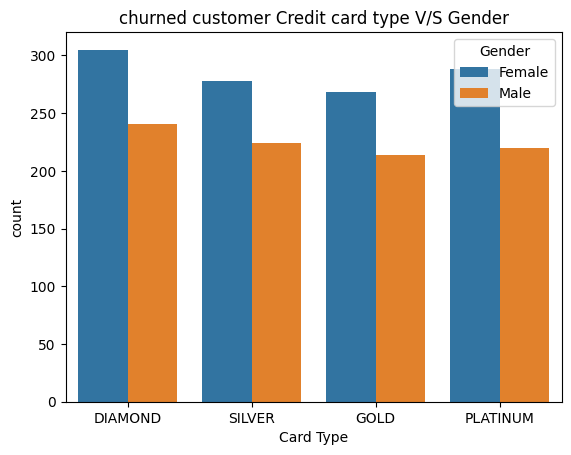

In [106]:

sns.countplot(x = data[data['Exited'] == 1]['Card Type'],hue = data['Gender'])
plt.title("churned customer Credit card type V/S Gender")


In [107]:
data.loc[data['Exited']== 1,['Balance','Complain','Card Type','Satisfaction Score']]


,Balance,Complain,Card Type,Satisfaction Score
0,0.00,1,DIAMOND,2
2,159660.80,1,DIAMOND,3
5,113755.78,1,DIAMOND,5
7,115046.74,1,DIAMOND,2
16,132602.88,0,SILVER,2
...,...,...,...,...
9981,152039.70,1,GOLD,3
9982,137145.12,1,GOLD,4
9991,88381.21,1,GOLD,3
9997,0.00,1,SILVER,3


In [108]:
pd.crosstab(index = data[data['Exited'] == 1]['Card Type'],columns = data[data['Exited'] == 1]['Complain'],margins=True).reset_index()


Complain,Card Type,0,1,All
0,DIAMOND,1,545,546
1,GOLD,1,481,482
2,PLATINUM,0,508,508
3,SILVER,2,500,502
4,All,4,2034,2038


<Axes: xlabel='Card Type', ylabel='count'>

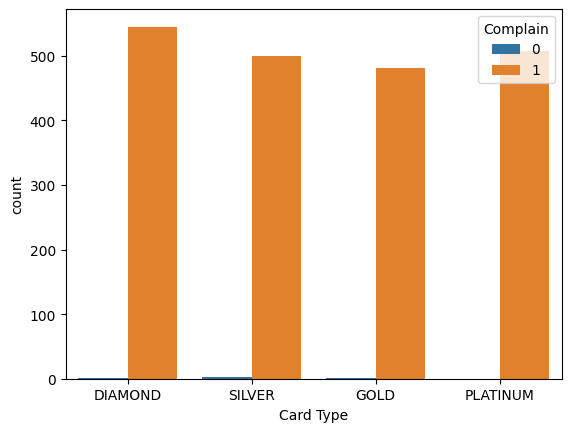

In [109]:
sns.countplot(x = data[data['Exited'] == 1]['Card Type'],hue = data[data['Exited'] == 1]['Complain'])


satisfaction score for Customer who churned out and have complained to banking services were visualize as below shown



Text(0.5, 1.0, 'Churned Customer Satisfaction Score V/S Card Type')

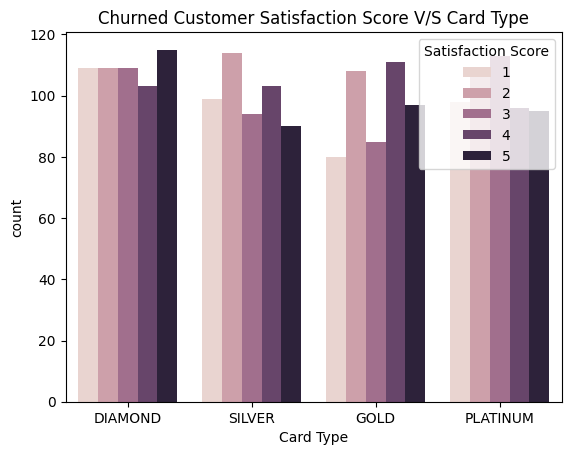

In [110]:
sns.countplot(x = data[(data['Exited'] ==1) & (data['Complain']==1)]['Card Type'],hue = data[data['Exited'] == 1]['Satisfaction Score'])
plt.title('Churned Customer Satisfaction Score V/S Card Type')


<Axes: xlabel='Card Type', ylabel='count'>

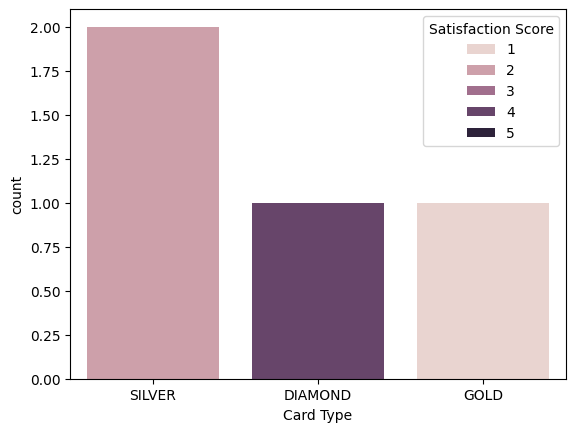

In [111]:
sns.countplot(x = data[(data['Exited'] ==1) & (data['Complain']==0)]['Card Type'],hue = data[data['Exited'] == 1]['Satisfaction Score'])


Checking Credit card Age wise


<Figure size 500x500 with 0 Axes>

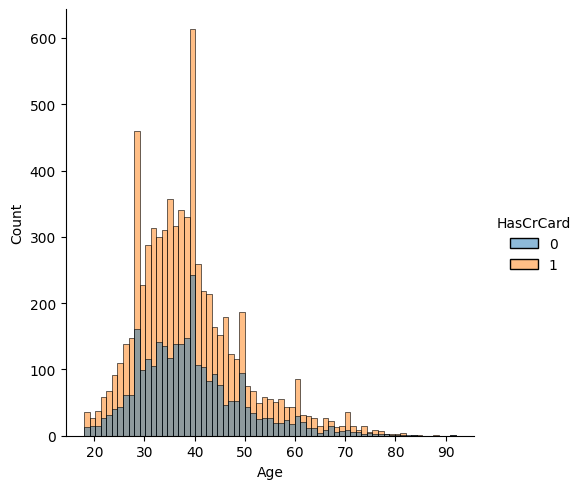

<Figure size 500x500 with 0 Axes>

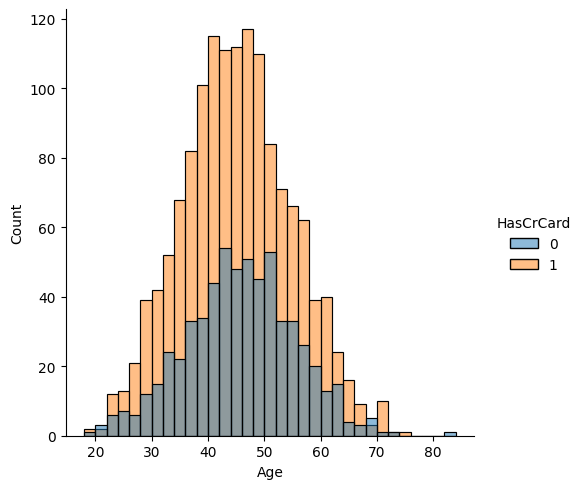

<Figure size 500x500 with 0 Axes>

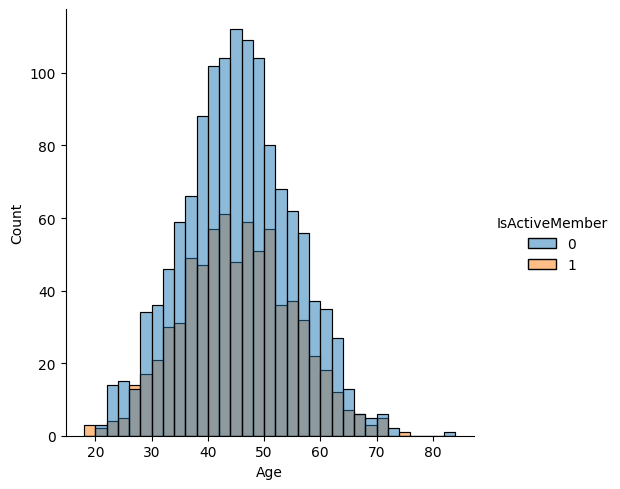

In [112]:

plt.figure(figsize=(5, 5))
sns.displot(data=data, x="Age", hue="HasCrCard")
plt.figure(figsize=(5, 5))  # Create a new figure
sns.displot(data=data[data["Exited"] == 1], x="Age", hue="HasCrCard")
plt.figure(figsize=(5, 5))
sns.displot(data=data[data["Exited"] == 1], x="Age", hue="IsActiveMember")

the people who churned were more active member in age group of 30-55.

these are set of people who are customer of the bank now we will analyze customer who were churned were of

<Figure size 500x500 with 0 Axes>

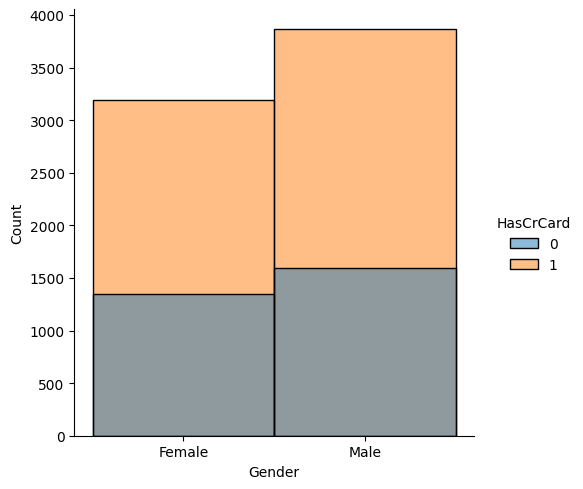

<Figure size 500x500 with 0 Axes>

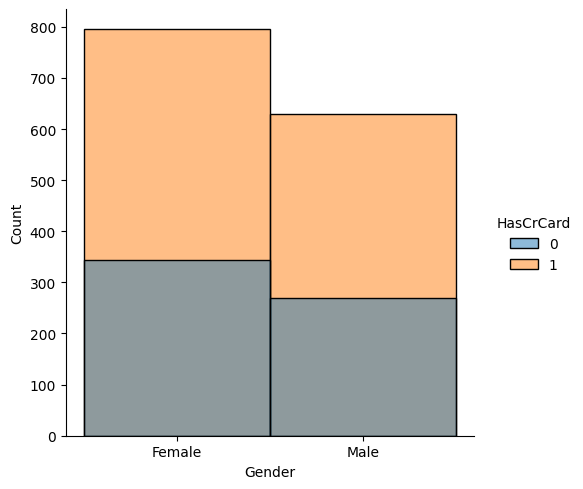

<Figure size 500x500 with 0 Axes>

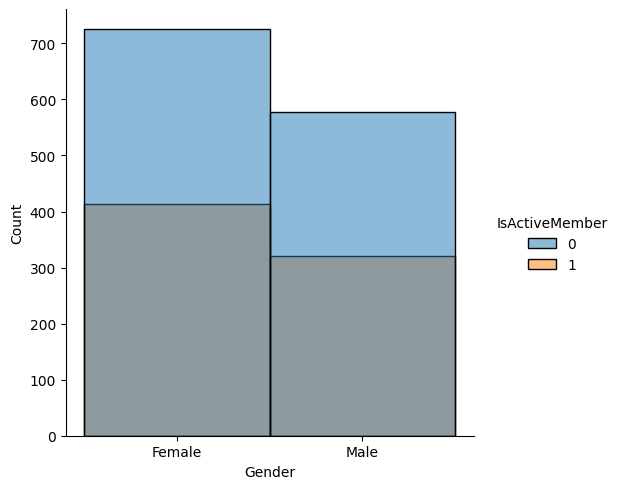

In [113]:
plt.figure(figsize=(5, 5))
sns.displot(data=data, x="Gender", hue="HasCrCard")
plt.figure(figsize=(5, 5))  # Create a new figure
sns.displot(data=data[data["Exited"] == 1], x="Gender", hue="HasCrCard")
plt.figure(figsize=(5, 5))
sns.displot(data=data[data["Exited"] == 1], x="Gender", hue="IsActiveMember")

Reccomondation:

Focus on Customer with Credit score between 600-700 as they are more likely to churn. Keep a guard rail check on the 30-40 year of age people as they are loyal customers the Age from 40 – 50 were the mostly who churned so incentivize them too so they not churned in future Gender has an impact on churning so and incentives for gender can benefits the customer Focus on credit card service and bring innovation as people who left were most of who have credit card with them

Observation & Recommendation:
The Customer churning are dependent on Variables like Credit Score ,Age and Geography, Balance Tenure has no relation with customer who churned

Recommendation
Focus on Customer with Credit score between 600-700 as they are more likely to churn.

Keep a guard rail check on the 30-40 year of age people as they are loyal customers ,the Age from 40 – 50 were the mostly who churned so incentivize them too so they not churned in future

Gender has an impact on churning so an incentives for both gender can benefits the customer

Focus on credit card service and bring innovation as people who left were most of who have credit card with them

Geography especially France as most customer centric and Balance should be considered for predicting the next possible churn

Conclusion
Customer leaving the bank makes a significant impact on firm reputation and leads to financial loss and in order to deal with this crisis a comprehensive data analysis needed for making an informed decision by decision makers